In [1]:
!pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from collections import Counter
import warnings

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

%matplotlib inline
np.random.seed(42)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.3f}'.format
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/creditcard.csv")
df.head()

Mounted at /content/gdrive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Fraud:  (492, 31)
No Fraud:  (284315, 31)


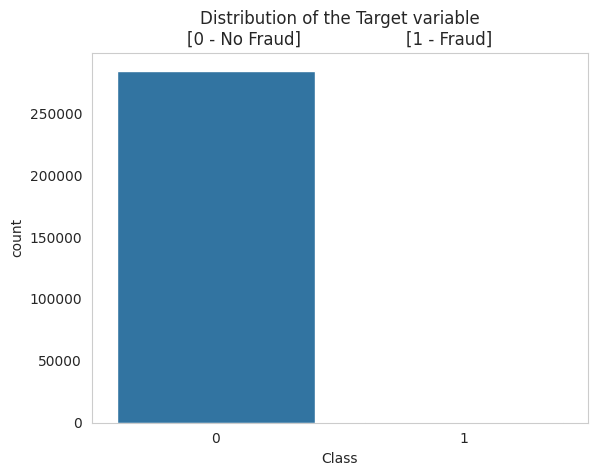

In [6]:
import seaborn as sns

print('Fraud: ', df[df['Class'] == 1].shape)
print('No Fraud: ', df[df['Class'] == 0].shape)

sns.countplot(x='Class', data=df)
plt.title('Distribution of the Target variable\n[0 - No Fraud]                    [1 - Fraud]')
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [8]:
print('Amount [No Fraud]')
print(df.Amount[df['Class'] == 0].describe())
print('------------------------------')
print('Amount [Fraud]')
print(df.Amount[df['Class'] == 1].describe())

Amount [No Fraud]
count   284315.000
mean        88.291
std        250.105
min          0.000
25%          5.650
50%         22.000
75%         77.050
max      25691.160
Name: Amount, dtype: float64
------------------------------
Amount [Fraud]
count    492.000
mean     122.211
std      256.683
min        0.000
25%        1.000
50%        9.250
75%      105.890
max     2125.870
Name: Amount, dtype: float64


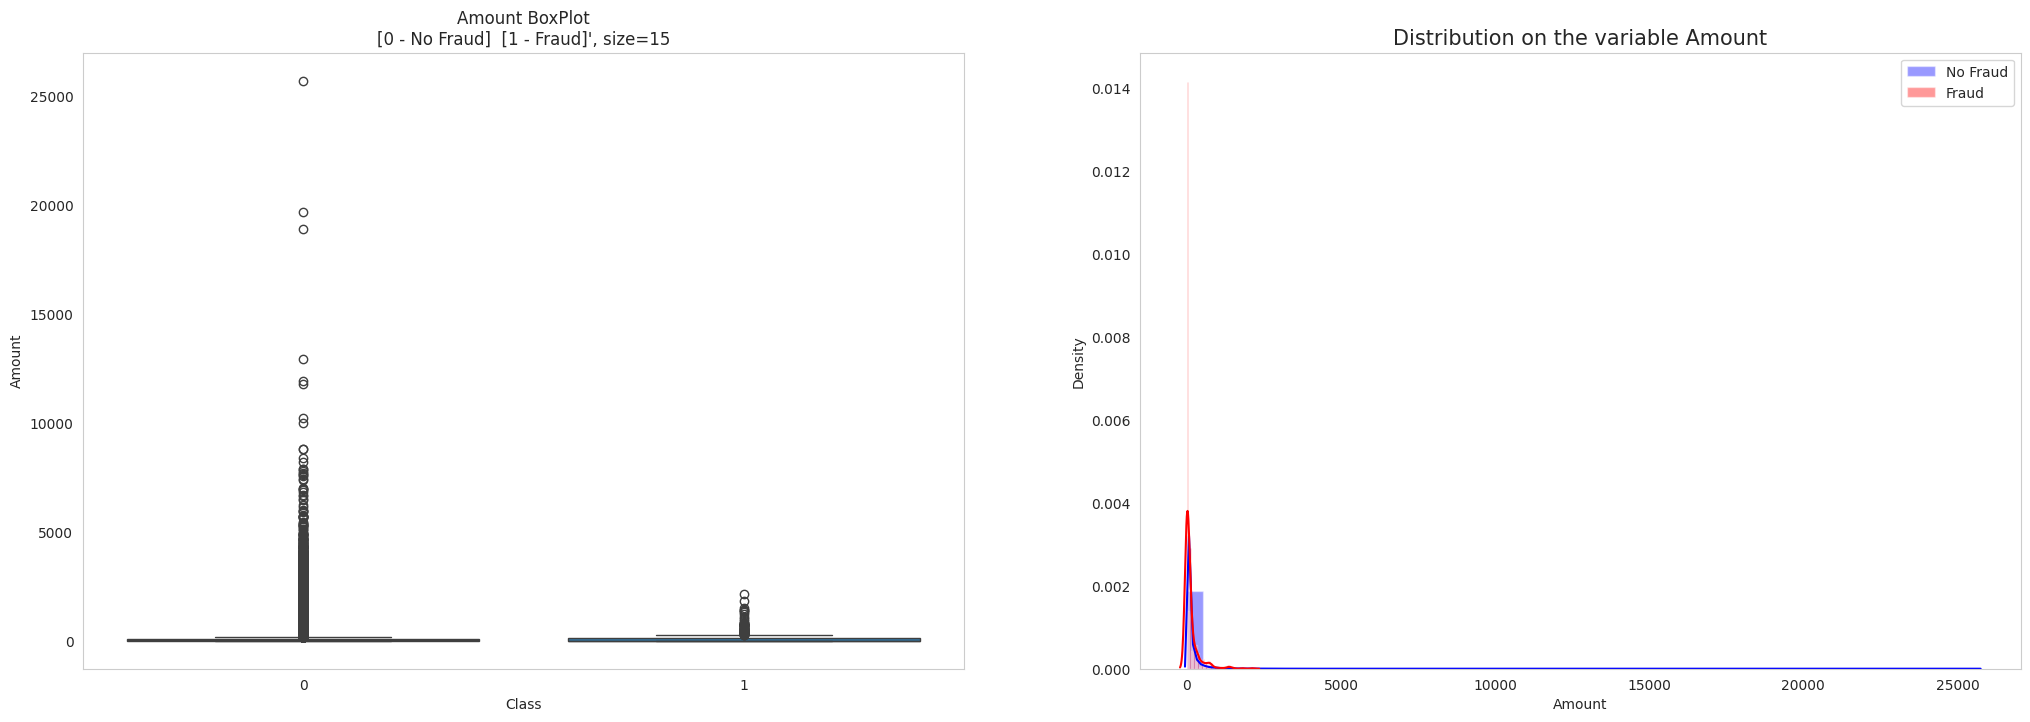

In [9]:
f, axes = plt.subplots(1, 2, figsize=(25,8))

sns.boxplot(x='Class', y='Amount', ax=axes[0], data=df).set_title("Amount BoxPlot\n[0 - No Fraud]  [1 - Fraud]', size=15")
sns.distplot(df.Amount[df['Class'] == 0], ax=axes[1], bins=50, label="No Fraud", color="b").set_title("Distribution on the variable Amount", size=15)
sns.distplot(df.Amount[df['Class'] == 1], ax=axes[1], bins=50, label="Fraud", color="r")
plt.legend()
plt.show()

In [10]:
print("Ocurrence of value 0 in the column Amount group by Class")
print(df.Amount.eq(0).astype(int).groupby(df.Class).sum())

Ocurrence of value 0 in the column Amount group by Class
Class
0    1798
1      27
Name: Amount, dtype: int64


In [11]:
df.drop(df.loc[df['Amount'] == 0].index, inplace=True)
df.shape

(282982, 31)

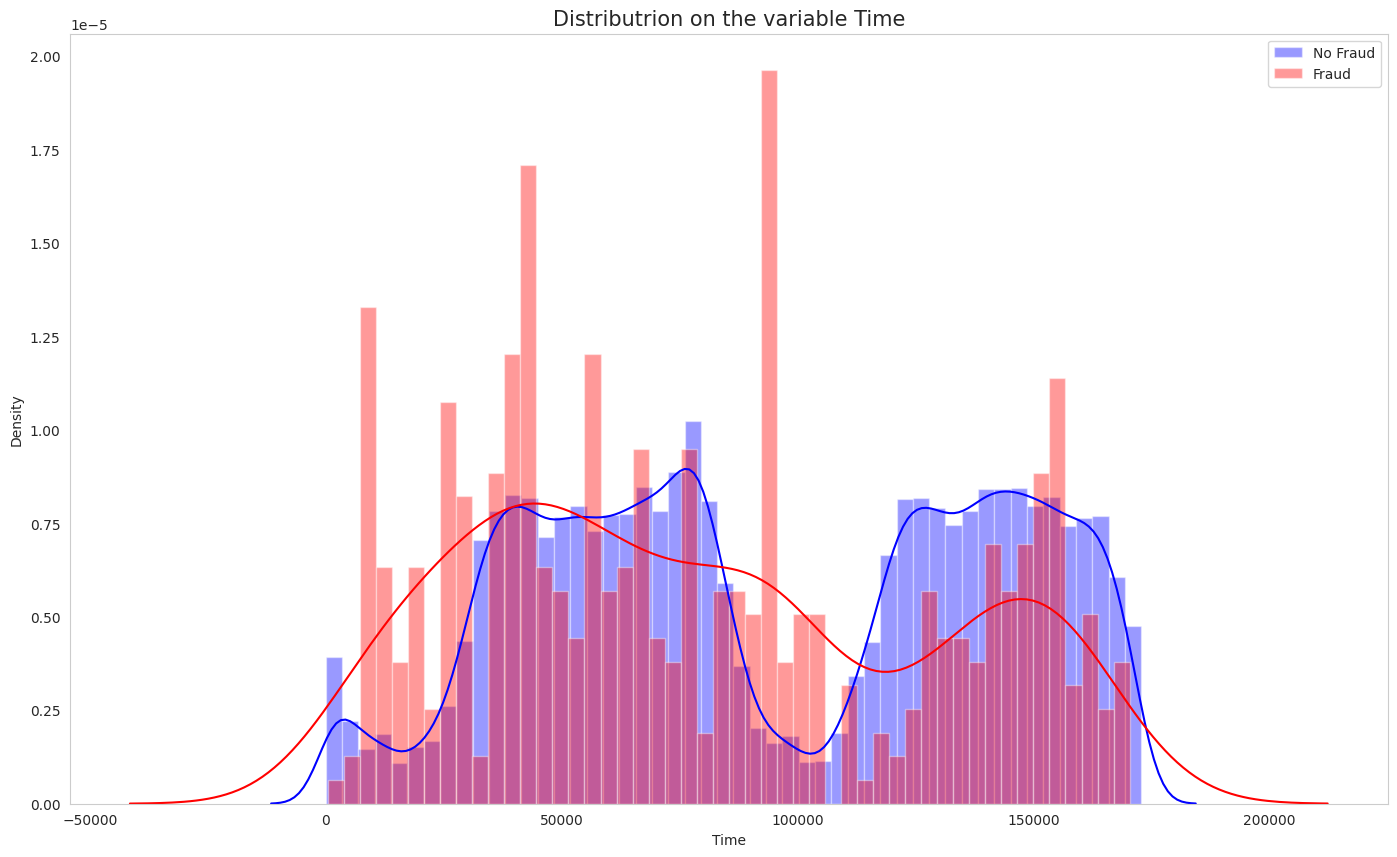

In [12]:
plt.figure(figsize=(17,10))
sns.distplot(df.Time[df['Class'] == 0], bins=50, label="No Fraud", color="b").set_title("Distributrion on the variable Time", size=15)
sns.distplot(df.Time[df['Class'] == 1], bins=50, label="Fraud", color="r")
plt.legend()
plt.show()

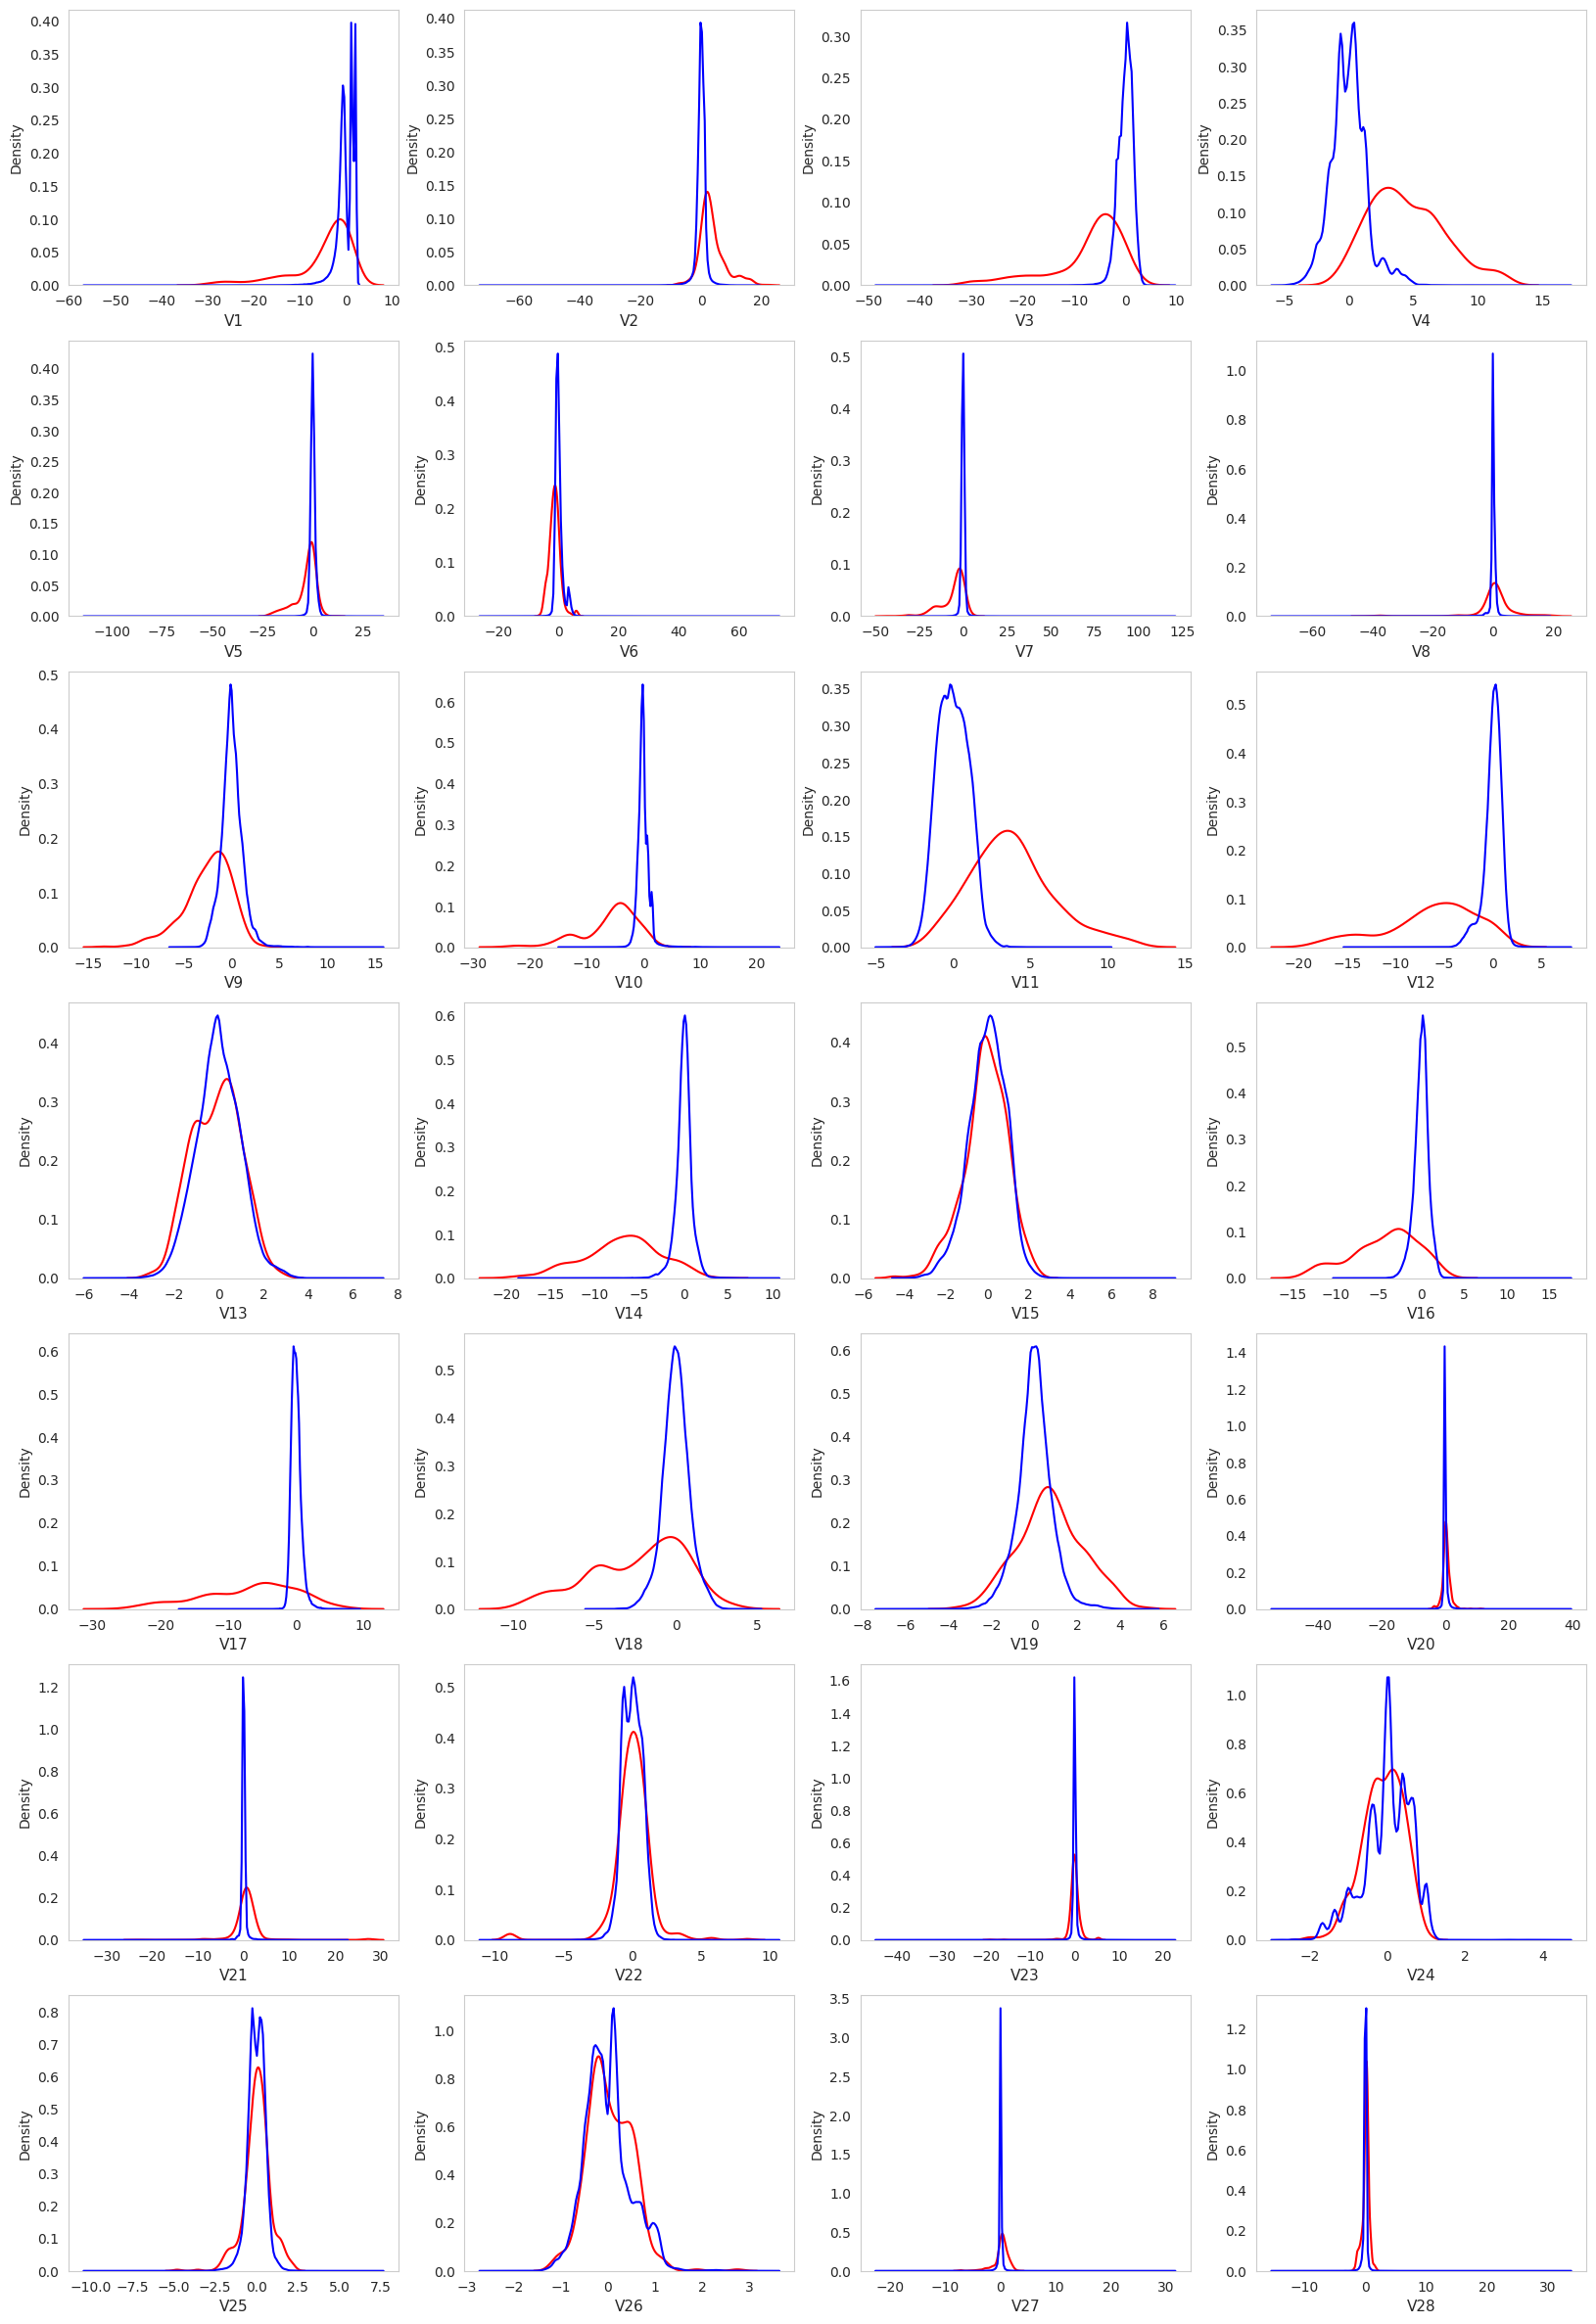

In [13]:
fig, ax = plt.subplots(7, 4, figsize=(20,30))

i = 0
for c in df.columns[1:-2]:
    i += 1
    plt.subplot(7, 4, i)
    sns.kdeplot(df.loc[df['Class'] == 1][c], label="Fraud", color="r")
    sns.kdeplot(df.loc[df['Class'] == 0][c], label="Not Fraud", color="b")
    plt.xlabel(c, fontsize=11)
plt.show()

In [14]:
cols = list(df.columns.values)
cols.pop(cols.index('Time'))
cols.pop(cols.index('Amount'))
df = df[['Time', 'Amount'] + cols]

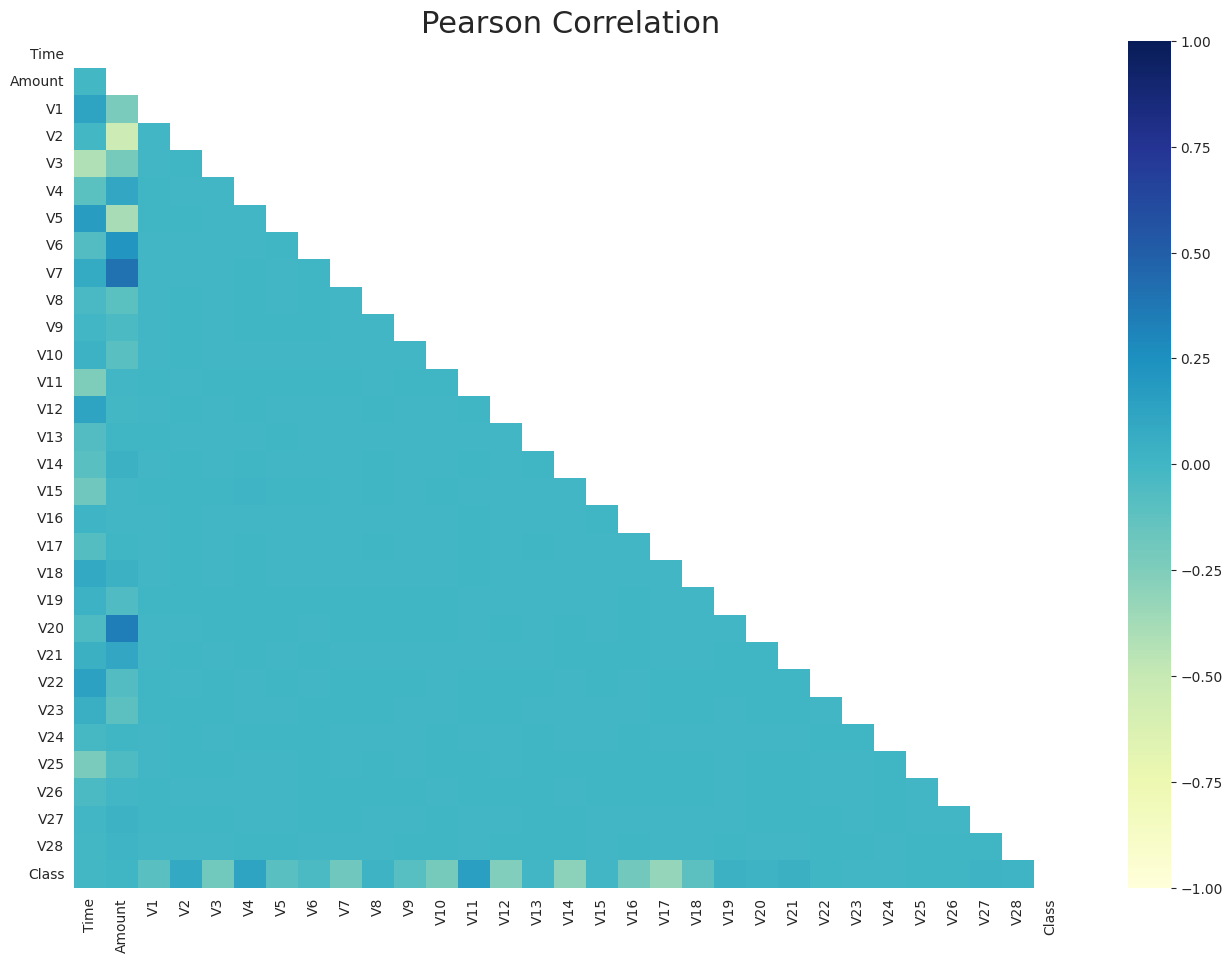

In [15]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)  # Replace np.bool with bool
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,11))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,  cmap="YlGnBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values).set_title("Pearson Correlation", size=22)
plt.show()


In [16]:
df['Hours'] = np.ceil((df['Time']/3600).mod(24))
df.drop('Time',axis=1, inplace=True)

cols = list(df.columns.values)
cols.pop(cols.index('Hours'))
df = df[['Hours'] + cols]

df.head()

,Hours,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.000,149.620,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,...,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,0.000,2.690,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,...,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,1.000,378.660,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,...,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,1.000,123.500,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,...,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,1.000,69.990,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,...,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


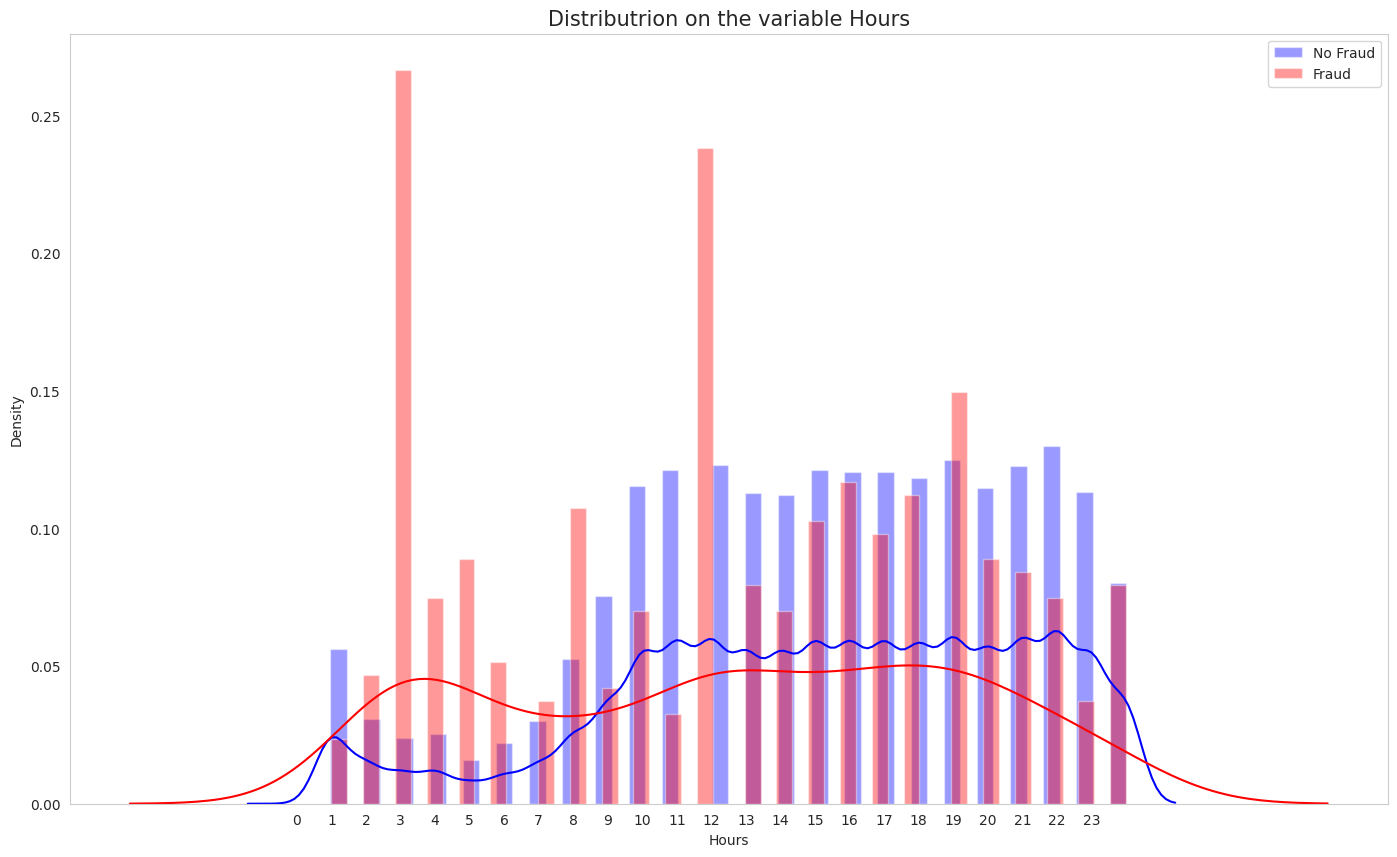

In [17]:
plt.figure(figsize=(17,10))
sns.distplot(df.Hours[df['Class'] == 0], bins=50, label="No Fraud", color="b").set_title("Distributrion on the variable Hours", size=15)
sns.distplot(df.Hours[df['Class'] == 1], bins=50, label="Fraud", color="r")
plt.xticks(range(0,24))
plt.legend()
plt.show()

In [18]:
# Original data
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('Train:', X_train.shape)
print('Test:', X_test.shape)
print('Target distribution on train:', Counter(y_train))
print('Target distribution on test:', Counter(y_test))

Train: (226385, 30)
Test: (56597, 30)
Target distribution on train: Counter({0: 226013, 1: 372})
Target distribution on test: Counter({0: 56504, 1: 93})


In [19]:
from sklearn.model_selection import cross_validate

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}


********************
RandomForestClassifier
Results:
Accuracy: 1.0
Precision: 0.96
Recall: 0.76
F1: 0.85
AUC: 0.97
********************
XGBClassifier
Results:
Accuracy: 1.0
Precision: 0.96
Recall: 0.78
F1: 0.86
AUC: 0.99


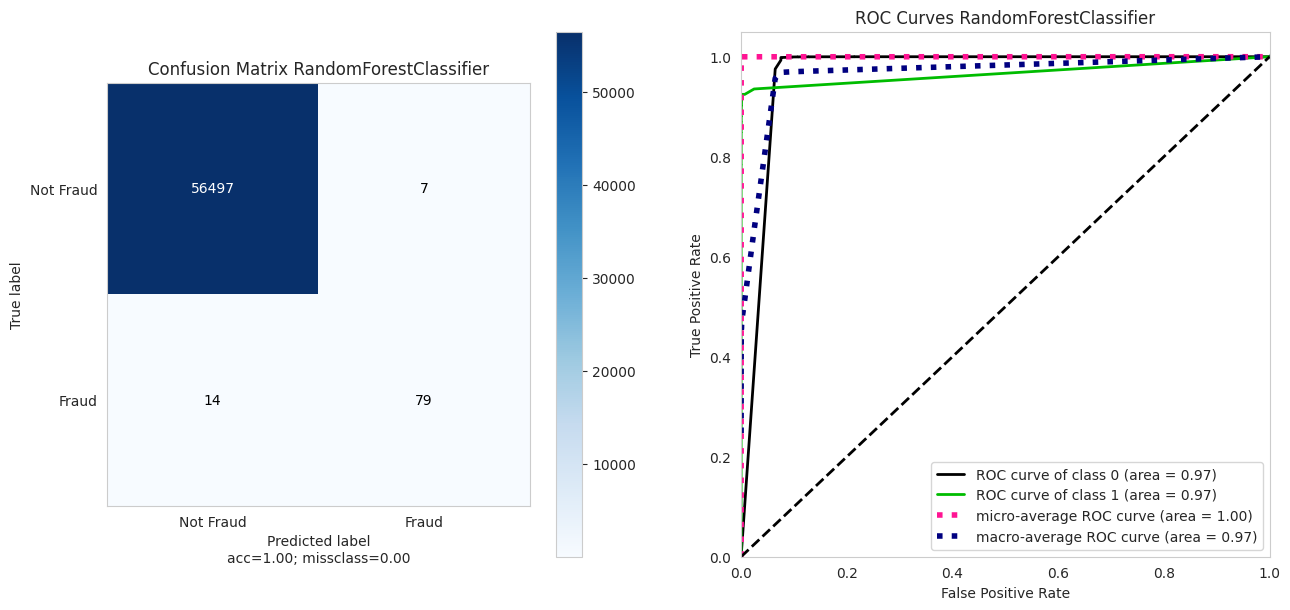

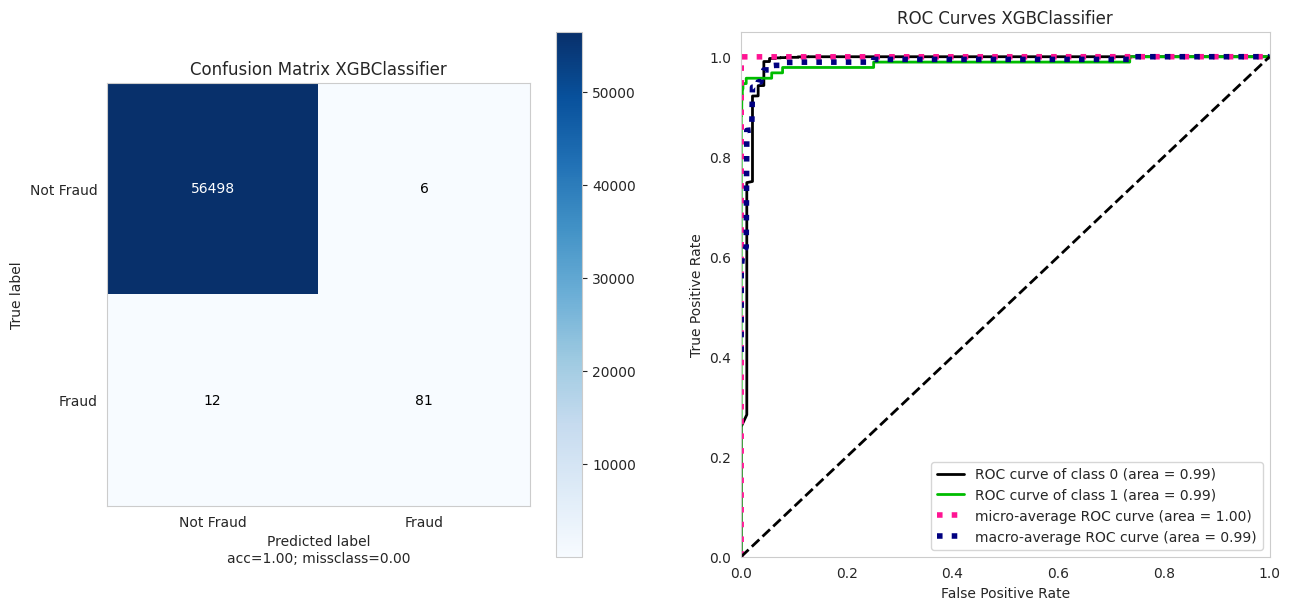

In [20]:
i = 0
for classifier in classifiers.values():
    i += 1
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print("*"*20)
    print(classifier.__class__.__name__)
    print("Results:")
    scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=5)
    print("Accuracy:", np.round(scores['test_accuracy'].mean(), 2))
    print("Precision:", np.round(scores['test_precision'].mean(), 2))
    print("Recall:", np.round(scores['test_recall'].mean(), 2))
    print("F1:", np.round(scores['test_f1'].mean(), 2))
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC:", np.round(auc, 2))

    plt.figure(figsize=(15,15))

    ax1 = plt.subplot(2, 2, i)
    i += 1
    skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False, ax=ax1)
    ax1.set_yticklabels(['Not Fraud', 'Fraud'])
    ax1.set_xticklabels(['Not Fraud', 'Fraud'])
    ax1.set_xlabel('Predicted label\nacc={:0.2f}; missclass={:0.2f}'.format(accuracy_score(y_test, predictions), 1 - accuracy_score(y_test, predictions)))
    ax1.set_title('Confusion Matrix {}'.format(classifier.__class__.__name__))

    y_probas = classifier.predict_proba(X_test)
    ax2 = plt.subplot(2, 2, i)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(10,8), ax=ax2)
    ax2.set_title('ROC Curves {}'.format(classifier.__class__.__name__))

In [21]:
def preprocessing_fnn(data):
    norm = (data - data.mean())/data.std()
    return norm

X_train_fnn = preprocessing_fnn(X_train)
X_test_fnn = preprocessing_fnn(X_test)

In [22]:
def model_fnn():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(256, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(128, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(64, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(32, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Nadam())

    return model

In [24]:
model_dl = model_fnn()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=10)
hist = model_dl.fit(X_train_fnn, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
2830/2830 [==============================] - 33s 10ms/step - loss: 0.0332 - val_loss: 0.0042
Epoch 2/10
2830/2830 [==============================] - 29s 10ms/step - loss: 0.0051 - val_loss: 0.0925
Epoch 3/10
2830/2830 [==============================] - 28s 10ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 4/10
2830/2830 [==============================] - 28s 10ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 5/10
2830/2830 [==============================] - 28s 10ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 6/10
2830/2830 [==============================] - 28s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 7/10
2830/2830 [==============================] - 29s 10ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/10
2830/2830 [==============================] - 31s 11ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 9/10
2830/2830 [==============================] - 30s 10ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 10/10
2830/2830 [==============================] - 30s 10m

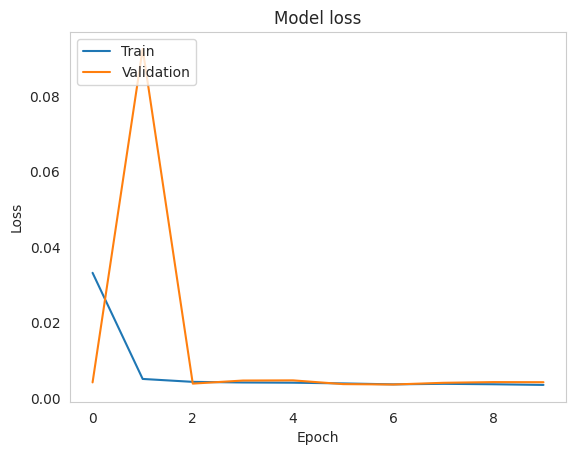

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
predictions = model_dl.predict(X_test_fnn, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)


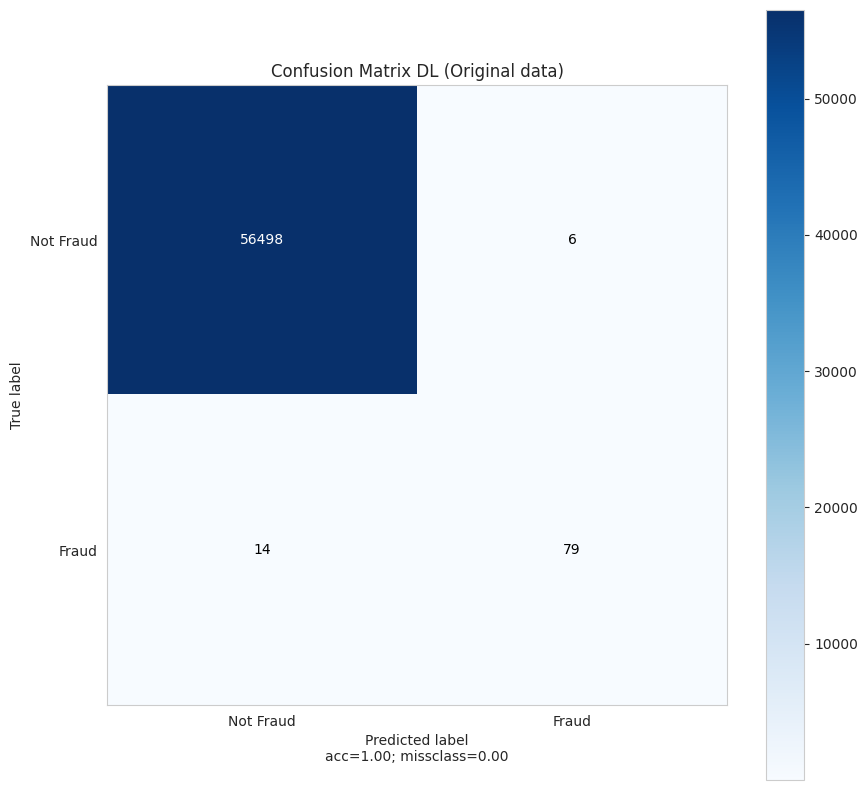

In [29]:
threshold = 0.5  # Adjust this threshold as per your model's performance

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, binary_predictions, normalize=False, ax=ax1)
ax1.set_yticklabels(['Not Fraud', 'Fraud'])
ax1.set_xticklabels(['Not Fraud', 'Fraud'])
ax1.set_xlabel('Predicted label\nacc={:0.2f}; missclass={:0.2f}'.format(accuracy_score(y_test, binary_predictions), 1 - accuracy_score(y_test, binary_predictions)))
ax1.set_title('Confusion Matrix DL (Original data)')
plt.show()


In [30]:
model_dl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               15872     
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131072    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 256)              